In [1]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import networkx as nx
import plotly.graph_objects as go

tables = {}
table_names = []
for f in os.listdir('./parquet'):
    table_names.append(f.split('.')[0])
    tables[f.split('.')[0]] = pd.read_parquet(f'./parquet/{f}')
table_keys = {i: tables[i].columns.values for i in tables}

In [2]:
family_name = [s[0] for s in tables['BIOG_MAIN']['c_name_chn'].values]

In [4]:
with open('./test.csv', 'w', encoding='utf-8') as f:
    pd.DataFrame(family_name).to_csv(f)

In [5]:
with open('./test.txt', 'w', encoding='utf-8') as f:
    f.write(','.join(family_name))

In [19]:
sery = pd.value_counts(family_name)

In [23]:
pd.DataFrame({'weight': sery.values[:500], 'word': sery.index[:500]}).to_csv('./test.csv', encoding='utf-8', index=False)

In [135]:
for k, v in pd.value_counts(tables['BIOG_MAIN']['c_dy']).iteritems():
    print(k, v)

19.0 215755
20.0 111739
15.0 73458
6.0 53893
18.0 24691
0.0 17617
21.0 4682
84.0 2649
30.0 1005
17.0 678
5.0 579
7.0 553
28.0 474
77.0 461
25.0 438
27.0 405
14.0 399
29.0 391
23.0 386
44.0 365
16.0 326
31.0 287
10.0 275
32.0 266
52.0 248
58.0 228
26.0 191
24.0 178
2.0 139
11.0 129
35.0 115
1.0 111
12.0 101
42.0 99
47.0 93
8.0 80
49.0 68
36.0 61
48.0 53
40.0 45
41.0 45
53.0 43
34.0 42
22.0 34
4.0 31
65.0 25
3.0 25
9.0 24
75.0 21
45.0 19
13.0 19
61.0 18
64.0 16
39.0 15
78.0 14
68.0 14
56.0 12
46.0 11
38.0 10
63.0 9
51.0 8
72.0 7
55.0 7
50.0 5
67.0 4
73.0 4
81.0 4
37.0 3
66.0 3
59.0 2
57.0 2
62.0 1
60.0 1
76.0 1
69.0 1


In [2]:
dynasty = [2, 23, 27, 5, 6, 15, 18, 19, 20, 21]
df = pd.DataFrame({'朝代': [], '性别': [], '计数': []})
df_dy = pd.read_parquet('./parquet/DYNASTIES.parq')
for dy in dynasty:
    df.loc[len(df)] = [df_dy[df_dy['c_dy']==dy]['c_dynasty_chn'].values[0], '男', sum((tables['BIOG_MAIN']['c_dy']==dy) & (tables['BIOG_MAIN']['c_female']==0))]
    df.loc[len(df)] = [df_dy[df_dy['c_dy']==dy]['c_dynasty_chn'].values[0], '女', sum((tables['BIOG_MAIN']['c_dy']==dy) & (tables['BIOG_MAIN']['c_female']==0))]
fig = px.bar(df, x="朝代", y="计数", color='性别', barmode='group', log_y=True, range_y=[1, 2e5])
fig.show()

In [3]:
dynasty = [2, 23, 27, 5, 6, 15, 18, 19, 20, 21]
df = pd.DataFrame({'朝代': [], '性别': [], '平均寿命': []})
df_dy = pd.read_parquet('./parquet/DYNASTIES.parq')
for dy in dynasty:
    df.loc[len(df)] = [df_dy[df_dy['c_dy']==dy]['c_dynasty_chn'].values[0], '男', np.mean(tables['BIOG_MAIN'][(tables['BIOG_MAIN']['c_dy']==dy) & (tables['BIOG_MAIN']['c_female']==0)]['c_death_age'])]
    df.loc[len(df)] = [df_dy[df_dy['c_dy']==dy]['c_dynasty_chn'].values[0], '女', np.mean(tables['BIOG_MAIN'][(tables['BIOG_MAIN']['c_dy']==dy) & (tables['BIOG_MAIN']['c_female']==1)]['c_death_age'])]
fig = px.bar(df, x="朝代", y="平均寿命", color='性别', barmode='group')
fig.show()

In [16]:
migrate = {p: {'end': tables['BIOG_ADDR_DATA'][(tables['BIOG_ADDR_DATA']['c_addr_type']==10)&(tables['BIOG_ADDR_DATA']['c_personid']==p)]['c_addr_id'].values[0]} for p in tables['BIOG_ADDR_DATA'][tables['BIOG_ADDR_DATA']['c_addr_type']==10]['c_personid'].values}
for index, row in tables['BIOG_ADDR_DATA'][tables['BIOG_ADDR_DATA']['c_addr_type']==9].iterrows():
    migrate[row['c_personid']] = {'end': row['c_addr_id']}

In [17]:
for p in set(migrate.keys()):
    if len(tables['BIOG_ADDR_DATA'][(tables['BIOG_ADDR_DATA']['c_personid']==p)&(tables['BIOG_ADDR_DATA']['c_addr_type']==1)]['c_addr_id'].values)>0:
        migrate[p]['start'] = tables['BIOG_ADDR_DATA'][(tables['BIOG_ADDR_DATA']['c_personid']==p)&(tables['BIOG_ADDR_DATA']['c_addr_type']==1)]['c_addr_id'].values[0]
    else:
        del migrate[p]

In [18]:
tables['ADDR_XY']

,c_addr_id,x_coord,y_coord,c_source_reference,c_source_id,c_notes
0,1,0.0,0.0,None,None,None
1,2,0.0,0.0,None,None,None
2,3,0.0,0.0,None,None,None
3,4,0.0,0.0,None,None,None
4,5,0.0,0.0,None,None,None
...,...,...,...,...,...,...
19244,500026,0.0,0.0,None,None,None
19245,500027,0.0,0.0,None,None,None
19246,500028,0.0,0.0,None,None,None
19247,500029,0.0,0.0,None,None,None


In [19]:
tables['ADDRESSES']

,c_addr_id,c_addr_cbd,c_name,c_name_chn,c_admin_type,c_firstyear,c_lastyear,x_coord,y_coord,belongs1_ID,belongs1_Name,belongs2_ID,belongs2_Name,belongs3_ID,belongs3_Name,belongs4_ID,belongs4_Name,belongs5_ID,belongs5_Name
0,16819,None,Baodi,寶坻,Xian,1235.0,1367.0,117.302422,39.725895,16814.0,大都路,16777.0,中書省,16776.0,元朝,NaN,None,NaN,None
1,16799,None,Xintai,新泰,Xian,1235.0,1367.0,117.755882,35.909660,16795.0,泰安州,16777.0,中書省,16776.0,元朝,NaN,None,NaN,None
2,16816,None,Wanping,宛平,Xian,1235.0,1367.0,NaN,NaN,16814.0,大都路,16777.0,中書省,16776.0,元朝,NaN,None,NaN,None
3,17194,None,Pingjin,平晉,Xian,1235.0,1367.0,112.566277,37.736397,17191.0,冀寧路,16777.0,中書省,16776.0,元朝,NaN,None,NaN,None
4,17230,None,Jian Zhou,堅州,Zhou,1235.0,1367.0,113.285347,39.176880,17191.0,冀寧路,16777.0,中書省,16776.0,元朝,NaN,None,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51262,600271,None,Suide,綏德,Xian,1224.0,1234.0,110.263362,37.502940,3721.0,綏德州,3709.0,延安府,3708.0,鄜延路,2814.0,金朝,NaN,None
51263,600272,None,Mizhi,米脂,Xian,1224.0,1234.0,110.183754,37.755417,3721.0,綏德州,3709.0,延安府,3708.0,鄜延路,2814.0,金朝,NaN,None
51264,600273,None,Siwu,嗣武,Xian,1224.0,1234.0,110.060915,37.867172,3721.0,綏德州,3709.0,延安府,3708.0,鄜延路,2814.0,金朝,NaN,None
51265,600274,None,Suiping,綏平,Xian,1224.0,1234.0,109.849550,37.355351,3721.0,綏德州,3709.0,延安府,3708.0,鄜延路,2814.0,金朝,NaN,None


In [2]:
G = nx.DiGraph()
df1 = tables['BIOG_ADDR_DATA'][tables['BIOG_ADDR_DATA']['c_personid']==3767]
df1 = df1.sort_values(by="c_sequence", inplace=False, ascending=True)
addrs = df1['c_addr_id'].values
for i in range(len(addrs)):
    G.add_node(tables['ADDRESSES'][tables['ADDRESSES']['c_addr_id']==addrs[i]]['c_name_chn'].values[0],
        x = tables['ADDRESSES'][tables['ADDRESSES']['c_addr_id']==addrs[i]]['x_coord'].values[0],
        y = tables['ADDRESSES'][tables['ADDRESSES']['c_addr_id']==addrs[i]]['y_coord'].values[0]
    )
    if i<len(addrs)-1:
        G.add_edge(
            tables['ADDRESSES'][tables['ADDRESSES']['c_addr_id']==addrs[i]]['c_name_chn'].values[0],
            tables['ADDRESSES'][tables['ADDRESSES']['c_addr_id']==addrs[i+1]]['c_name_chn'].values[0]
        )
G.remove_edges_from(nx.selfloop_edges(G))

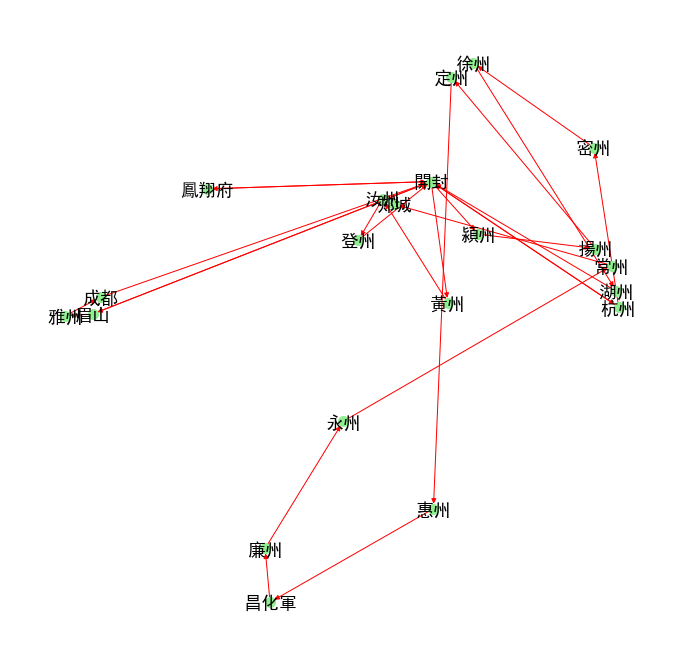

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
ax=plt.gca()

nx.draw(G, pos={k: (G.nodes[k]['x'], G.nodes[k]['y']) for k in G.nodes}, ax=ax, node_color='lightgreen', edge_color='red', with_labels = True, font_size=18, node_size=100)
plt.savefig("movement.pdf", bbox_inches='tight')
plt.show()

In [ ]:
G = nx.DiGraph()
for p in migrate:
    if migrate[p]['start'] in tables['ADDR_XY']['c_addr_id'].values and migrate[p]['end'] in tables['ADDR_XY']['c_addr_id'].values:
        G.add_node(
            tables['ADDRESSES'][tables['ADDRESSES']['c_addr_id']==migrate[p]['start']]['c_name_chn'].values[0],
            x = tables['ADDR_XY'][tables['ADDR_XY']['c_addr_id']==migrate[p]['start']]['x_coord'],
            y = tables['ADDR_XY'][tables['ADDR_XY']['c_addr_id']==migrate[p]['start']]['y_coord'],
        )
        G.add_node(
            tables['ADDRESSES'][tables['ADDRESSES']['c_addr_id']==migrate[p]['end']]['c_name_chn'].values[0],
            x = tables['ADDR_XY'][tables['ADDR_XY']['c_addr_id']==migrate[p]['end']]['x_coord'],
            y = tables['ADDR_XY'][tables['ADDR_XY']['c_addr_id']==migrate[p]['end']]['y_coord'],
        )

In [46]:
tables['ADDR_XY'][tables['ADDR_XY']['c_addr_id']==15003]

,c_addr_id,x_coord,y_coord,c_source_reference,c_source_id,c_notes
12970,15003,110.332306,34.835129,95497,None,None


In [51]:
def constellation(month, day):
    if (month==3 and day>=21) or (month==4 and day<=20):
        return '白羊'
    elif (month==4 and day>=21) or (month==5 and day<=21):
        return '金牛'
    elif (month==5 and day>=22) or (month==6 and day<=21):
        return '双子'
    elif (month==6 and day>=22) or (month==7 and day<=22):
        return '巨蟹'
    elif (month==7 and day>=23) or (month==8 and day<=23):
        return '狮子'
    elif (month==8 and day>=24) or (month==9 and day<=23):
        return '处女'
    elif (month==9 and day>=24) or (month==10 and day<=23):
        return '天秤'
    elif (month==10 and day>=24) or (month==11 and day<=22):
        return '天蝎'
    elif (month==11 and day>=23) or (month==12 and day<=21):
        return '射手'
    elif (month==12 and day>=22) or (month==1 and day<=20):
        return '摩羯'
    elif (month==1 and day>=21) or (month==2 and day<=19):
        return '水瓶'
    elif (month==2 and day>=20) or (month==3 and day<=20):
        return '双鱼'

constellation(12, 5)

'射手'

In [82]:
months = tables['BIOG_MAIN']['c_by_month'][(tables['BIOG_MAIN']['c_by_month']>0)&(tables['BIOG_MAIN']['c_by_day']>0)].values
days = tables['BIOG_MAIN']['c_by_day'][(tables['BIOG_MAIN']['c_by_month']>0)&(tables['BIOG_MAIN']['c_by_day']>0)].values

stats = pd.value_counts(tables['BIOG_MAIN'][tables['BIOG_MAIN']['c_by_month']>0])

fig = px.bar({'出生月份': stats.index, '计数': stats.values}, x='出生月份', y='计数', color='计数')
fig.show()

In [87]:
pd.value_counts(tables['BIOG_MAIN']['c_female'])

0    466148
1     49340
Name: c_female, dtype: int64

In [64]:
pd.value_counts(tables['BIOG_MAIN']['c_by_day'].values)

13.0    420
10.0    419
29.0    400
24.0    394
20.0    390
15.0    390
5.0     385
28.0    382
6.0     381
21.0    379
14.0    373
1.0     372
18.0    372
7.0     370
2.0     367
19.0    360
16.0    360
12.0    357
22.0    353
8.0     351
25.0    350
4.0     350
3.0     350
9.0     344
27.0    343
17.0    341
23.0    338
11.0    337
26.0    331
0.0     267
30.0    191
31.0      1
33.0      1
dtype: int64

In [38]:
set(tables['BIOG_MAIN']['c_dy'].values[tables['BIOG_MAIN']['c_dy'].values > 0])

{1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 72.0,
 73.0,
 75.0,
 76.0,
 77.0,
 78.0,
 81.0,
 84.0}

In [10]:
import dtale
dtale.show(tables['BIOG_MAIN'], open_browser=True)

/Users/DaweiFu/opt/anaconda3/lib/python3.9/site-packages/dtale/views.py:746: FutureWarning:

['c_tribe', 'c_fl_ey_notes', 'c_fl_ly_notes', 'c_surname', 'c_surname_chn', 'c_mingzi', 'c_mingzi_chn', 'c_notes', 'c_surname_proper', 'c_mingzi_proper', 'c_name_proper', 'c_surname_rm', 'c_mingzi_rm', 'c_name_rm', 'c_created_by', 'c_created_date', 'c_modified_by', 'c_modified_date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



Exception occurred while processing request: query "tts_sysno=='0.0'" found no data, please alter
Traceback (most recent call last):
  File "/Users/DaweiFu/opt/anaconda3/lib/python3.9/site-packages/dtale/views.py", line 111, in _handle_exceptions
    return func(*args, **kwargs)
  File "/Users/DaweiFu/opt/anaconda3/lib/python3.9/site-packages/dtale/views.py", line 1866, in test_filter
    run_query(
  File "/Users/DaweiFu/opt/anaconda3/lib/python3.9/site-packages/dtale/query.py", line 76, in run_query
    raise Exception('query "{}" found no data, please alter'.format(query))
Exception: query "tts_sysno=='0.0'" found no data, please alter


2022-12-12 18:18:29,560 - ERROR    - Exception occurred while processing request: query "tts_sysno=='0.0'" found no data, please alter
Traceback (most recent call last):
  File "/Users/DaweiFu/opt/anaconda3/lib/python3.9/site-packages/dtale/views.py", line 111, in _handle_exceptions
    return func(*args, **kwargs)
  File "/Users/DaweiFu/opt/anaconda3/lib/python3.9/site-packages/dtale/views.py", line 1866, in test_filter
    run_query(
  File "/Users/DaweiFu/opt/anaconda3/lib/python3.9/site-packages/dtale/query.py", line 76, in run_query
    raise Exception('query "{}" found no data, please alter'.format(query))
Exception: query "tts_sysno=='0.0'" found no data, please alter


In [58]:
tables['BIOG_MAIN'].columns.values

array(['tts_sysno', 'c_personid', 'c_name', 'c_name_chn', 'c_index_year',
       'c_index_year_type_code', 'c_index_year_source_id', 'c_female',
       'c_index_addr_id', 'c_index_addr_type_code', 'c_ethnicity_code',
       'c_household_status_code', 'c_tribe', 'c_birthyear',
       'c_by_nh_code', 'c_by_nh_year', 'c_by_range', 'c_deathyear',
       'c_dy_nh_code', 'c_dy_nh_year', 'c_dy_range', 'c_death_age',
       'c_death_age_range', 'c_fl_earliest_year', 'c_fl_ey_nh_code',
       'c_fl_ey_nh_year', 'c_fl_ey_notes', 'c_fl_latest_year',
       'c_fl_ly_nh_code', 'c_fl_ly_nh_year', 'c_fl_ly_notes', 'c_surname',
       'c_surname_chn', 'c_mingzi', 'c_mingzi_chn', 'c_dy',
       'c_choronym_code', 'c_notes', 'c_by_intercalary',
       'c_dy_intercalary', 'c_by_month', 'c_dy_month', 'c_by_day',
       'c_dy_day', 'c_by_day_gz', 'c_dy_day_gz', 'c_surname_proper',
       'c_mingzi_proper', 'c_name_proper', 'c_surname_rm', 'c_mingzi_rm',
       'c_name_rm', 'c_created_by', 'c_created_date',

In [61]:
person_keys = {}
for i in table_keys:
    if 'c_personid' in table_keys[i]:
        print(i, table_keys[i][0])
        person_keys.update({k: i for k in table_keys[i]})
person_keys

ENTRY_DATA tts_sysno
BIOG_INST_DATA c_personid
POSSESSION_DATA c_personid
STATUS_DATA tts_sysno
EVENTS_DATA c_personid
ALTNAME_DATA tts_sysno
POSTED_TO_ADDR_DATA tts_sysno
ASSOC_DATA tts_sysno
BIOG_ADDR_DATA tts_sysno
POSTING_DATA c_personid
KIN_DATA tts_sysno
BIOG_TEXT_DATA tts_sysno
POSTED_TO_OFFICE_DATA tts_sysno
TMP_INDEX_YEAR c_personid
EVENTS_ADDR c_event_record_id
POSSESSION_ADDR c_possession_record_id
BIOG_MAIN tts_sysno
BIOG_SOURCE_DATA c_personid


{'tts_sysno': 'BIOG_MAIN',
 'c_personid': 'BIOG_SOURCE_DATA',
 'c_entry_code': 'ENTRY_DATA',
 'c_sequence': 'POSTED_TO_OFFICE_DATA',
 'c_exam_rank': 'ENTRY_DATA',
 'c_kin_code': 'KIN_DATA',
 'c_kin_id': 'KIN_DATA',
 'c_assoc_code': 'ASSOC_DATA',
 'c_assoc_id': 'ASSOC_DATA',
 'c_year': 'EVENTS_ADDR',
 'c_age': 'ENTRY_DATA',
 'c_nianhao_id': 'ENTRY_DATA',
 'c_entry_nh_year': 'ENTRY_DATA',
 'c_entry_range': 'ENTRY_DATA',
 'c_inst_code': 'POSTED_TO_OFFICE_DATA',
 'c_inst_name_code': 'POSTED_TO_OFFICE_DATA',
 'c_exam_field': 'ENTRY_DATA',
 'c_entry_addr_id': 'ENTRY_DATA',
 'c_parental_status': 'ENTRY_DATA',
 'c_attempt_count': 'ENTRY_DATA',
 'c_source': 'POSTED_TO_OFFICE_DATA',
 'c_pages': 'BIOG_SOURCE_DATA',
 'c_secondary_source_author': 'BIOG_SOURCE_DATA',
 'c_notes': 'BIOG_SOURCE_DATA',
 'c_posting_notes': 'ENTRY_DATA',
 'c_created_by': 'BIOG_MAIN',
 'c_created_date': 'BIOG_MAIN',
 'c_modified_by': 'BIOG_MAIN',
 'c_modified_date': 'BIOG_MAIN',
 'c_bi_role_code': 'BIOG_INST_DATA',
 'c_bi_

In [62]:
meaning = pd.read_csv('./字段含义.csv')
meaning

,column_code,meaning_cn,meaning_en,data_type,coded,code_table,note,affiliated_table
0,c_addr_id,地址ID,address ID,NaN,NaN,NaN,NaN,ADDRESSES
1,c_addr_cbd,用于数据库维护的临时表,the temporary table for maintenance,NaN,NaN,NaN,NaN,ADDRESSES
2,c_name,地址名称,address name,NaN,NaN,NaN,NaN,ADDRESSES
3,c_name_chn,地址中文名称,address Chinese name,NaN,NaN,NaN,NaN,ADDRESSES
4,c_admin_type,行政区类别,administrative type,NaN,NaN,NaN,NaN,ADDRESSES
...,...,...,...,...,...,...,...,...
454,c_text_type_sortorder,书籍分类顺序,the sorted order of text types,NaN,NaN,NaN,NaN,TEXT_TYPE
455,c_range,范围,range,NaN,NaN,NaN,NaN,YEAR_RANGE_CODES
456,c_range_chn,范围中文,range in Chinese,NaN,NaN,NaN,NaN,YEAR_RANGE_CODES
457,c_approx,时间的相对准确度,relative degree of exactness of a date,NaN,NaN,NaN,NaN,YEAR_RANGE_CODES


In [63]:
df1 = pd.DataFrame({
    '字段': [k for k in person_keys if k in meaning['column_code'].values], 
    '中文意思': [meaning['meaning_cn'].values[meaning['column_code']==k][0] for k in person_keys if k in meaning['column_code'].values],
    '隶属表格': [person_keys[k] for k in person_keys if k in meaning['column_code'].values],
})
with open('./人物维度.csv', 'w', encoding='utf-8') as f:
    df1.to_csv(f, index=False, header=True)

In [6]:
neighbor = {}
intermediate = []
for i in table_names:
    if len(table_keys[i]) == 2:
        intermediate.append(i)
    for j in table_names:
        if i==j:
            continue
        if table_keys[i][0] in table_keys[j]:
            if i not in neighbor:
                neighbor[i] = {j: None}
            else:
                neighbor[i].update({j: None})
print(len(neighbor.keys()))
neighbor

77


{'ENTRY_DATA': {'OFFICE_CODES': None,
  'BIOG_INST_DATA': None,
  'STATUS_DATA': None,
  'EVENTS_DATA': None,
  'ALTNAME_DATA': None,
  'POSTED_TO_ADDR_DATA': None,
  'TEXT_INSTANCE_DATA': None,
  'ASSOC_DATA': None,
  'BIOG_ADDR_DATA': None,
  'TEXT_CODES': None,
  'POSTING_DATA': None,
  'KIN_DATA': None,
  'BIOG_TEXT_DATA': None,
  'POSTED_TO_OFFICE_DATA': None,
  'BIOG_MAIN': None},
 'PLACE_CODES': {'ADDR_PLACE_DATA': None},
 'SOCIAL_INSTITUTION_NAME_CODES': {'ENTRY_DATA': None,
  'BIOG_INST_DATA': None,
  'ASSOC_DATA': None,
  'SOCIAL_INSTITUTION_CODES': None,
  'SOCIAL_INSTITUTION_ALTNAME_DATA': None,
  'POSTED_TO_OFFICE_DATA': None,
  'SOCIAL_INSTITUTION_ADDR': None,
  'SOCIAL_INSTITUTION_CODES_CONVERSION': None},
 'ENTRY_TYPES': {'ENTRY_CODE_TYPE_REL': None},
 'OFFICE_CODES': {'ENTRY_DATA': None,
  'BIOG_INST_DATA': None,
  'STATUS_DATA': None,
  'EVENTS_DATA': None,
  'ALTNAME_DATA': None,
  'POSTED_TO_ADDR_DATA': None,
  'TEXT_INSTANCE_DATA': None,
  'ASSOC_DATA': None,
  'BI

In [7]:
for i in neighbor:
    for j in neighbor[i]:
        if table_keys[i][0] == table_keys[j][0]:
            neighbor[i][j] = '一对一'
        else:
            neighbor[i][j] = '一对多'
            

In [10]:
inter_tables = set(i for i in table_keys if len(table_keys[i])==2)
inter_tables

{'ASSOC_CODE_TYPE_REL',
 'CopyMissingTables',
 'CopyTables',
 'CopyTablesDefault',
 'ENTRY_CODE_TYPE_REL',
 'STATUS_CODE_TYPE_REL',
 'TEXT_BIBLCAT_CODE_TYPE_REL'}

In [12]:
candidates = []
for i in neighbor:
    for j in neighbor[i]:
        if (i in inter_tables or j in inter_tables) and neighbor[i][j] == '一对多':
            candidates.append((i, j))
candidates

[('ENTRY_TYPES', 'ENTRY_CODE_TYPE_REL'),
 ('ENTRY_CODE_TYPE_REL', 'ENTRY_DATA'),
 ('CopyTables', 'CopyMissingTables'),
 ('CopyTables', 'CopyTablesDefault'),
 ('STATUS_CODE_TYPE_REL', 'STATUS_DATA'),
 ('ASSOC_CODE_TYPE_REL', 'ENTRY_DATA'),
 ('ASSOC_CODE_TYPE_REL', 'ASSOC_DATA'),
 ('ASSOC_TYPES', 'ASSOC_CODE_TYPE_REL'),
 ('STATUS_TYPES', 'STATUS_CODE_TYPE_REL'),
 ('TEXT_BIBLCAT_TYPES', 'TEXT_BIBLCAT_CODE_TYPE_REL'),
 ('TablesFieldsChanges', 'CopyMissingTables'),
 ('TablesFieldsChanges', 'CopyTablesDefault')]

In [14]:
pairs = []
for pair1 in candidates:
    for pair2 in candidates:
        if pair1[0]==pair2[1]:
            pairs.append((pair1[1], pair2[0]))
pairs

[('ENTRY_DATA', 'ENTRY_TYPES'),
 ('STATUS_DATA', 'STATUS_TYPES'),
 ('ENTRY_DATA', 'ASSOC_TYPES'),
 ('ASSOC_DATA', 'ASSOC_TYPES')]

In [15]:
df = pd.DataFrame(columns=['表一', '表二', '表间关系'])
for i in neighbor:
    for j in neighbor[i]:
        df.loc[len(df)] = [i, j, neighbor[i][j]]

In [16]:
for p in pairs:
    df.loc[len(df)] = [p[0], p[1], '多对多']

In [17]:
with open('./表间关系.csv', 'w', encoding='utf-8') as f:
    df.to_csv(f, index=False)